In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Linear Regression

m and c are chosen to be the random co-efficients.

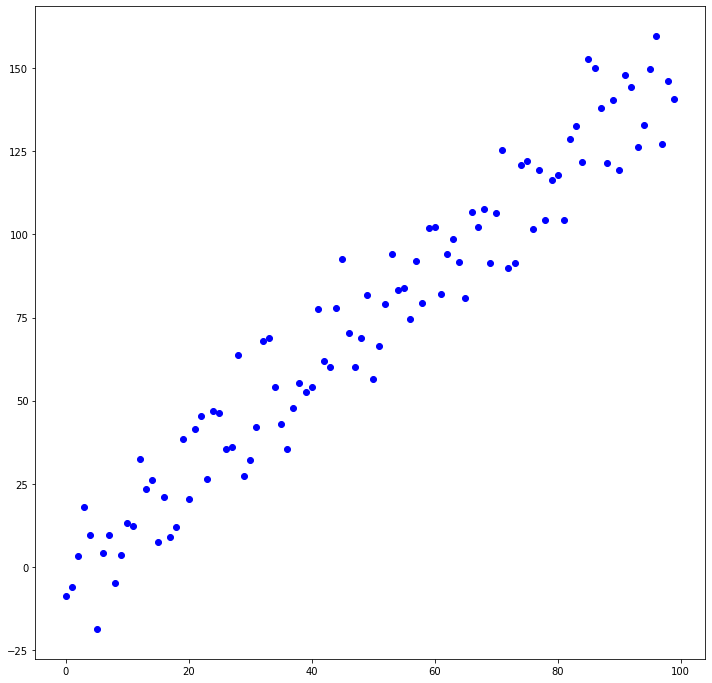

In [2]:
m = random.uniform(-5, 5)
c = random.uniform(-20, 20)

y = list(map(lambda x: m*x+c, list(range(100))))
x = list([1, i] for i in range(100))

x = np.array(x, dtype='float32')
y = np.array(y, dtype='float32')


x1 = np.array(list(range(100)), dtype='float32')
x0 = np.array(list(range(100)), dtype='float32')
x0 = x0*0 + 1

noise = np.random.normal(0, 10, [100])  #increased the stdev to spread the data more
y = y+noise

plt.figure(figsize=(12, 12))
plt.plot(y, 'bo')
plt.show()

### This section contains linear regression based on the criterion **|x-x'|**

In [3]:
 '''
 For cost=|y'-y|
 '''

b1 = [0, 0]
b1 = np.array(b1, dtype='float32')
alp = 1e-3

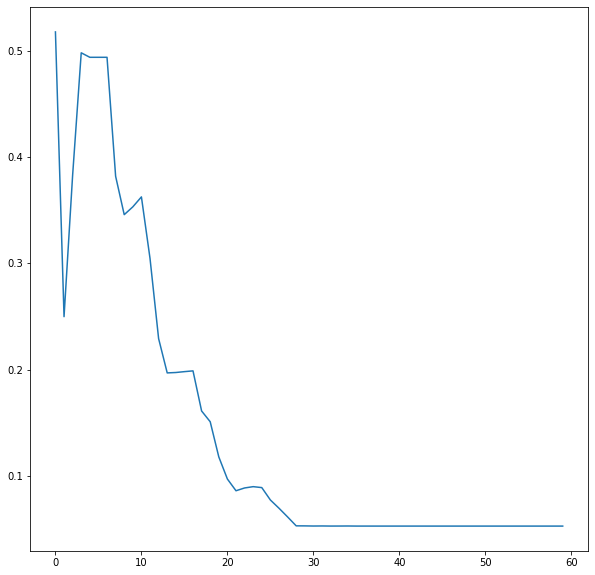

In [4]:
predictions1 = []
losses1 = []

y1 = (y-np.amin(y))/(np.amax(y)-np.amin(y)) #Normalising the data for better results

for i in range(60000):
    pred1 = x.dot(b1)
    predictions1.append(pred1)
    cost1 = np.average(abs(y1-pred1))
    if i%1000==0: losses1.append(cost1)
    if i%1000==0: alp=alp*0.9 #Decreasing the learning rate periodically helped.
    b1[0] = b1[0] - alp * np.average(np.sign(pred1-y1))
    b1[1] = b1[1] - alp * np.average(np.sign(pred1-y1)*x1)


losses1 = np.array(losses1)
plt.figure(figsize=(10, 10))
plt.plot(losses1)
plt.show()

[0.07704333 0.00894939] 






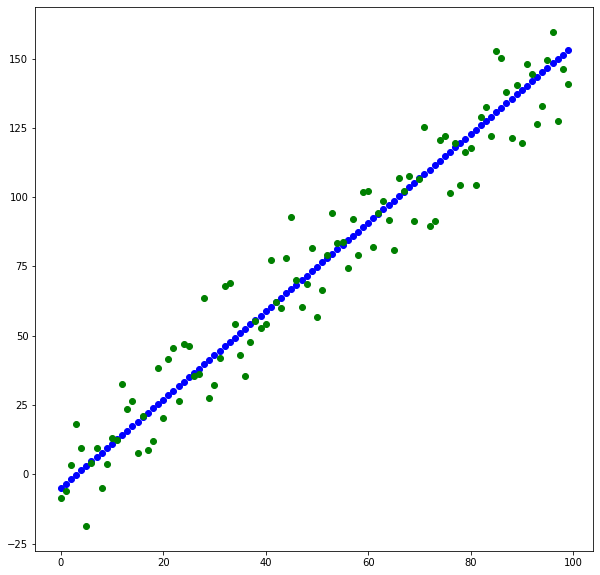

In [5]:
print(b1, "\n\n\n\n") #The coefficients aren't reliable as the input data was normalised
plt.figure(figsize=(10, 10))
plt.plot(x.dot(b1)*(np.amax(y)-np.amin(y))+np.amin(y), 'bo') #Graph is a better measure for accuracy
plt.plot(y, 'go')
plt.show()

### This section contains linear regression based on the criterion **|x-x'|<sup>3</sup>**

In [6]:
 '''
 For cost=|y'-y|^3
 '''

b3 = [0, 0]
b3 = np.array(b3, dtype='float32')
alp = 1e-6

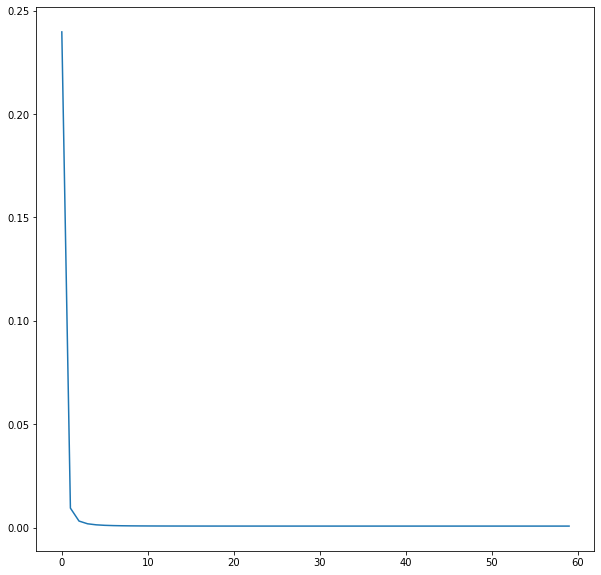

In [7]:
predictions3 = []
losses3 = []

y1 = (y-np.amin(y))/(np.amax(y)-np.amin(y)) #Normalising the data for better results

for i in range(60000):
    pred3 = x.dot(b3)
    predictions3.append(pred3)
    cost3 = np.average(abs((y1-pred3)**3))
    if i%1000==0: losses3.append(cost3)
    if i%1000==0: alp=alp*0.9
    b3[0] = b3[0] - alp * np.average(np.sign(pred3-y1)*(pred3-y1)**2)
    b3[1] = b3[1] - alp * np.average((np.sign(pred3-y1)*(pred3-y1)**2)*x1)


losses3 = np.array(losses3)
plt.figure(figsize=(10, 10))
plt.plot(losses3)
plt.show()

[0.00016937 0.00988289] 






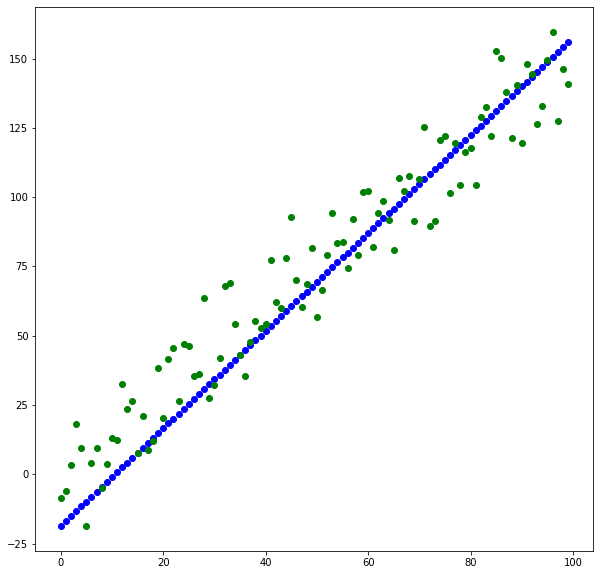

In [8]:
print(b3, "\n\n\n\n")
plt.figure(figsize=(10, 10))
plt.plot(x.dot(b3)*(np.amax(y)-np.amin(y))+np.amin(y), 'bo')
plt.plot(y, 'go')
plt.show()

# Polynomial Regression

a, b and c are chosen to be random constants

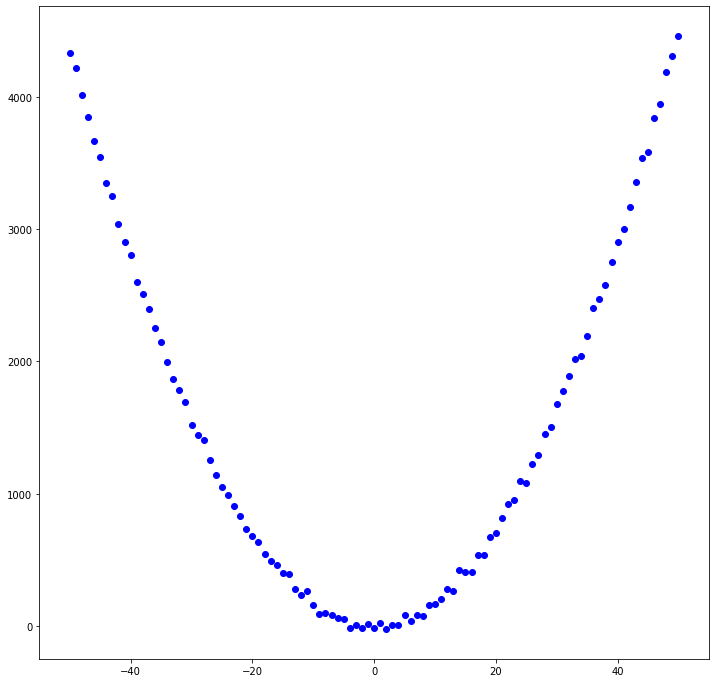

In [9]:
a = random.uniform(-2, 2)
b = random.uniform(-2, 2)
c = random.uniform(-2, 2)

y = list(map(lambda x: a*x**2+b*x+c, list(range(-50, 51))))
x = list([1, i, i**2] for i in range(-50, 51))

x = np.array(x, dtype='float32')
y = np.array(y, dtype='float32')


x1 = np.array(list(range(-50, 51)), dtype='float32')
x0 = np.array(list(range(-50, 51)), dtype='float32')
x0 = x0*0 + 1
x2 = x1*x1

noise = np.random.normal(0, 30, [101])  #increased the stdev to spread the data more
y = y+noise

plt.figure(figsize=(12, 12))
plt.plot(x1, y, 'bo')
plt.show()

### This section contains linear regression based on the criterion **|x-x'|<sup>4</sup>**

In [10]:
 '''
 For cost=|y'-y|^4
 '''

b4 = [0, 0, 0]
b4 = np.array(b4, dtype='float32')
alp = 1.1e-6

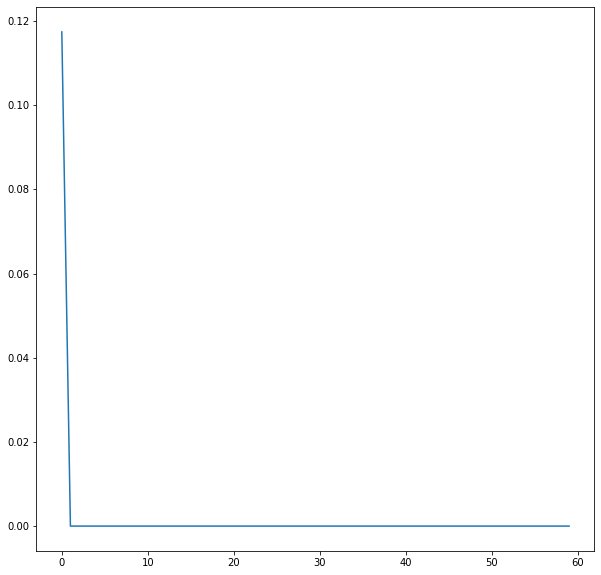

In [11]:
predictions = []
losses = []

y1 = (y-np.amin(y))/(np.amax(y)-np.amin(y))

for i in range(60000):
    pred1 = x.dot(b4)
    predictions.append(pred1)
    cost1 = np.average(abs((y1-pred1)**4))
    if i%1000==0: losses.append(cost1)
    if i%750==0: alp=alp*0.9
    b4[0] = b4[0] - alp * np.average((pred1-y1)**3)
    b4[1] = b4[1] - alp * np.average(((pred1-y1)**3)*x1)
    b4[2] = b4[2] - alp * np.average(((pred1-y1)**3)*x2)


losses = np.array(losses)
plt.figure(figsize=(10, 10))
plt.plot(losses)
plt.show()

[2.0858860e-07 1.8452146e-06 3.9851019e-04] 






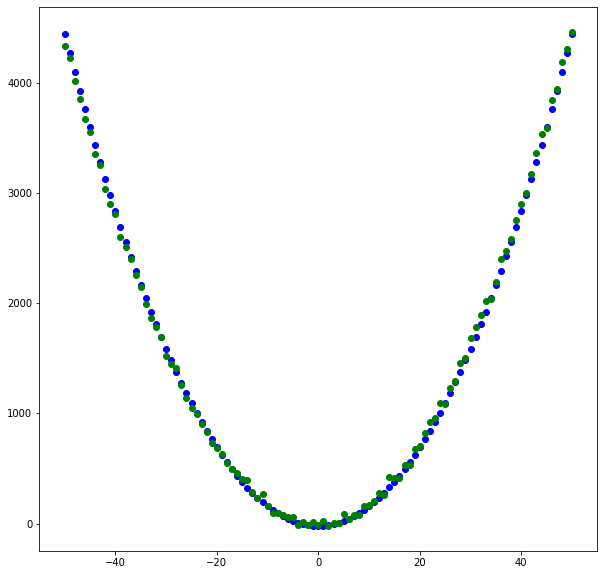

In [12]:
print(b4, "\n\n\n\n")
plt.figure(figsize=(10, 10))
plt.plot(x1, x.dot(b4)*(np.amax(y)-np.amin(y))+np.amin(y), 'bo') #Have to change predictions back because they were normalised before
plt.plot(x1, y, 'go')
plt.show()

In [13]:
 '''
 For cost=|y'-y|^7
 '''

b7 = [0, 0, 0]
b7 = np.array(b7, dtype='float32')
alp = 1e-7

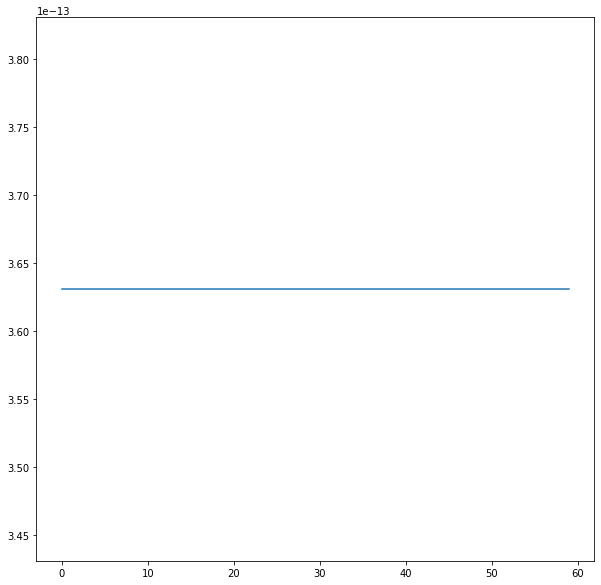

In [14]:
predictions = []
losses = []

y1 = (y-np.amin(y))/(np.amax(y)-np.amin(y))

for i in range(60000):
    pred = x.dot(b7)
    predictions.append(pred1)
    cost1 = np.average(abs((y1-pred1)**7))
    if i%1000==0: losses.append(cost1)
    if i%1000==0: alp=alp*0.9
    b7[0] = b7[0] - alp * np.average(np.sign(pred-y1)*(pred-y1)**6)
    b7[1] = b7[1] - alp * np.average((np.sign(pred-y1)*(pred-y1)**6)*x1)
    b7[2] = b7[2] - alp * np.average((np.sign(pred-y1)*(pred-y1)**6)*x2)


losses = np.array(losses)
plt.figure(figsize=(10, 10))
plt.plot(losses)
plt.show()

[1.4187559e-07 1.1947850e-06 3.1188663e-04] 






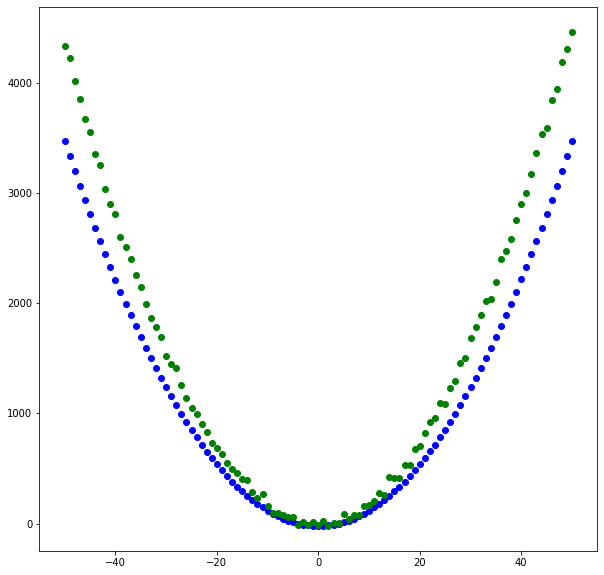

In [15]:
print(b7, "\n\n\n\n")
plt.figure(figsize=(10, 10))
plt.plot(x1, x.dot(b7)*(np.amax(y)-np.amin(y))+np.amin(y), 'bo')
plt.plot(x1, y, 'go')
plt.show()

## **Inferences**

*   Larger epochs ofcourse yield better fitting.
*   Changing the learning rate periodically was helpful.
*   Lower degree cost functions seemed to yield better results, at least in this case.

